# Resumo

O modelo leva em conta variações do SIR e SIAS, levando em conta a estimação de parâmetros para a razão entre indivíduos sintomáticos e assintomáticos, além da taxa de morte desses infectados.

Modelo utilizado: https://drive.google.com/file/d/1-TtbyNPqtQ1ur9f2_j16u4KLnNU87CVW/view?usp=sharing

#Introdução e objetivos

Por mais de um ano o mundo vem sentido o impacto do COVID-19. De acordo com a organização mundial de saúde, apesar da maioria das pessoas infectadas não sofrer de graves problemas respiratórios, as pessoas mais velhas e aquelas com alguma comorbidade podem desenvolver sérios problemas. Mesmo o primeiro caso tendo sido 
identificado em Wuhan, na China, o vírus conseguiu se espalhare chegou em 
Pernambuco, tendo o Brasil seu primeiro caso em São Paulo. Desde a chegada
já foram registrados quase 20 milhões de casos no Brasil e 590 mil em Pernambuco. Com os dados disponíveis podemos gerar uma boa simulação de como o Vírus deve se desenvolver em Pernambuco no restante de 2021 e também comparar com como ele se desenvolveu em 2020. Com tais dados em mão é possível mensurar o quanto o combate ao vírus melhorou (ou piorou) em 2021.

# Métodos

## Descrição

N = Total de indivíduos \
S = Indivíduos suscetíveis \
R = Recuperados \
$ I_a = $ Infectados assintomáticos \
$ I_s = $ Infectados sintomáticos \
D = Mortos 

$ \rho = $ Taxa de morte \
$ \beta _a = $ Taxa de infecção de assintomáticos \
$ \beta _s = $ Taxa de infecção de sintomáticos \
$ \gamma _a = $ Taxa de recuperação de assintomáticos \
$ \gamma _s = $ Taxa de recuperação de sintomáticos \
p = Probabilidade de ser sintomático \

## Equações dos modelos

### [SIR]

$$ \frac{\mathrm{dS} }{\mathrm{d} t} = \frac {-\beta IS}{N} $$

$$ \frac{\mathrm{dI} }{\mathrm{d} t} = \frac {\beta IS}{N} - \frac {\gamma I}{1 - \rho} $$

$$ \frac{\mathrm{dD} }{\mathrm{d} t} = \frac {\rho}{1 - \rho}\gamma I $$

### [SIAS]

$$ \frac{\mathrm{dS} }{\mathrm{d} t} = -(\beta _{a} I_{a} + \beta _{s} I_{s})\frac {S}{N} $$

$$ \frac{\mathrm{dI_{a}} }{\mathrm{d} t} = (1- p)(\beta _{a} I_{a} + \beta _{s} I_{s})\frac {S}{N} - \gamma _{a}I_{a} $$

$$ \frac{\mathrm{dI_{s}} }{\mathrm{d} t} = p(\beta _{a} I_{a} + \beta _{s} I_{s})\frac {S}{N} - \frac {\gamma _{s}I_{s}}{1 - \rho} $$

$$ \frac{\mathrm{dD} }{\mathrm{d} t} = \frac {\rho}{1 - \rho}\gamma _{s}I_{s} $$

In [ ]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

In [ ]:
# The SIR model differential equations.
def deriv(y, t, N, betaA, betaS, gammaA, gammaS, pSymp, deathRate):
    S, IA, IS, R, D = y
    dSdt = -(betaA*IA + betaS*IS)*S/N
    dIAdt = (1-pSymp)*(betaA*IA + betaS*IS)*S/N - gammaA*IA
    dISdt = pSymp*(betaA*IA + betaS*IS)*S/N - gammaS*IS/(1-deathRate)
    dRdt = gammaA*IA + gammaS*IS
    dDdt = gammaS*IS*deathRate/(1-deathRate)
    return dSdt, dIAdt, dISdt, dRdt, dDdt

#Cenário 1
Primeiro iremos testar um modelo com dados iniciais do começo da pandemia de forma a avaliar como o modelo conseguiria nos informar sobre o desenvolvimento da epidemia a partir do início

In [ ]:
# Total population, N.
N = 9278000
# Contact rate, beta (in 1/days/#Individuals), mean recovery rate, gamma, (in 1/days), probability of being asymptomatic and death rate (in 1/days).
betaA, betaS, gammaA, gammaS, pSymp, deathRate = 0.449, 0.449, 0.114, 0.139, 0.895, 0.03 
# Initial number of symptomatic and asymptomatic, recovered and dead individuals, IS0, IA0, R0 and D0.
R0, D0=0, 0
IS0,IA0= pSymp,1-pSymp
# Everyone else, S0, is susceptible to infection initially.
S0 = N - IA0 - IS0 - R0 - D0
# A grid of time points (in days)
t = np.linspace(0, 120, 120)

In [ ]:
# Initial conditions vector
y0 = S0, IA0, IS0, R0, D0
# Integrate the SIR equations over the time grid, t.
ret = odeint(deriv, y0, t, args=(N, betaA, betaS, gammaA, gammaS, pSymp, deathRate))
S, IA, IS, R, D = ret.T

In [ ]:
#checking if N remains constant
S+ IA+ IS+ R+ D

array([9278000.        , 9278000.00000001, 9278000.00000001,
       9278000.        , 9278000.        , 9278000.        ,
       9278000.        , 9278000.        , 9278000.        ,
       9278000.        , 9278000.        , 9278000.        ,
       9278000.        , 9278000.        , 9278000.        ,
       9278000.        , 9278000.        , 9278000.        ,
       9278000.        , 9278000.        , 9278000.        ,
       9278000.        , 9277999.99999999, 9278000.        ,
       9277999.99999999, 9278000.        , 9278000.        ,
       9278000.        , 9278000.        , 9277999.99999999,
       9277999.99999999, 9277999.99999999, 9277999.99999999,
       9277999.99999999, 9277999.99999999, 9277999.99999999,
       9277999.99999999, 9277999.99999999, 9277999.99999999,
       9277999.99999999, 9277999.99999999, 9277999.99999999,
       9277999.99999999, 9277999.99999999, 9277999.99999999,
       9277999.99999999, 9277999.99999999, 9277999.99999999,
       9277999.99999999,

In [ ]:
D[1:]/R[1:]

array([0.02817981, 0.02815219, 0.02812954, 0.02811112, 0.02809627,
       0.02808439, 0.02807496, 0.02806753, 0.02806171, 0.02805719,
       0.02805371, 0.02805102, 0.02804898, 0.02804742, 0.02804624,
       0.02804535, 0.02804468, 0.02804417, 0.0280438 , 0.02804351,
       0.0280433 , 0.02804315, 0.02804303, 0.02804294, 0.02804287,
       0.02804282, 0.02804277, 0.02804274, 0.0280427 , 0.02804266,
       0.02804262, 0.02804256, 0.02804249, 0.0280424 , 0.02804228,
       0.02804212, 0.0280419 , 0.0280416 , 0.0280412 , 0.02804065,
       0.02803992, 0.02803893, 0.02803762, 0.02803588, 0.0280336 ,
       0.02803064, 0.02802686, 0.02802212, 0.02801629, 0.02800926,
       0.02800099, 0.02799147, 0.02798077, 0.02796898, 0.02795625,
       0.02794275, 0.02792864, 0.0279141 , 0.02789929, 0.02788436,
       0.02786943, 0.02785463, 0.02784005, 0.02782578, 0.02781188,
       0.0277984 , 0.0277854 , 0.02777289, 0.02776092, 0.02774948,
       0.02773859, 0.02772826, 0.02771847, 0.02770923, 0.02770

In [ ]:
#death rate relative to recovered cases and to total population
(D[1:]/R[1:])[-1], D[-1]/N

(0.027592676016637355, 0.025592466383532957)

Taxa de mortos por recuperados do modelo em torno de 3%, conforme indicam os dados reais

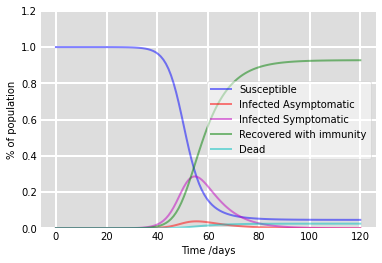

In [ ]:
# Plot the data on three separate curves for S(t), I(t) and R(t)
fig = plt.figure(facecolor='w')
ax = fig.add_subplot(111, facecolor='#dddddd', axisbelow=True)
ax.plot(t, S/N, 'b', alpha=0.5, lw=2, label='Susceptible')
ax.plot(t, IA/N, 'r', alpha=0.5, lw=2, label='Infected Asymptomatic')
ax.plot(t, IS/N, 'm', alpha=0.5, lw=2, label='Infected Symptomatic')
ax.plot(t, R/N, 'g', alpha=0.5, lw=2, label='Recovered with immunity')
ax.plot(t, D/N, 'c', alpha=0.5, lw=2, label='Dead')
ax.set_xlabel('Time /days')
ax.set_ylabel('% of population')
ax.set_ylim(0,1.2)
ax.yaxis.set_tick_params(length=0)
ax.xaxis.set_tick_params(length=0)
ax.grid(b=True, which='major', c='w', lw=2, ls='-')
legend = ax.legend()
legend.get_frame().set_alpha(0.5)
for spine in ('top', 'right', 'bottom', 'left'):
    ax.spines[spine].set_visible(False)
plt.savefig('sir.pdf')
plt.show()

#Cenário 2
Agora iremos usar os dados atuais da pandemia em Pernambuco.

In [ ]:
# Total population, N.
N = 9278000
# Contact rate, beta (in 1/days/#Individuals), mean recovery rate, gamma, (in 1/days), probability of being asymptomatic and death rate (in 1/days).
betaA, betaS, gammaA, gammaS, pSymp, deathRate = 0.449, 0.449, 0.114, 0.139, 0.895, 0.03 
# Initial number of symptomatic and asymptomatic, recovered and dead individuals, IS0, IA0, R0 and D0. ([1])
R0, D0=536625, 19337
#total cases minus dead and recovered equal current cases
current_cases = 605518-R0-D0
IS0,IA0= current_cases*pSymp,current_cases*(1-pSymp)
# Everyone else, S0, is susceptible to infection initially.
S0 = N - IA0 - IS0 - R0 - D0
# A grid of time points (in days)
t = np.linspace(0, 120, 120)

In [ ]:
# Initial conditions vector
y0 = S0, IA0, IS0, R0, D0
# Integrate the SIR equations over the time grid, t.
ret = odeint(deriv, y0, t, args=(N, betaA, betaS, gammaA, gammaS, pSymp, deathRate))
S, IA, IS, R, D = ret.T

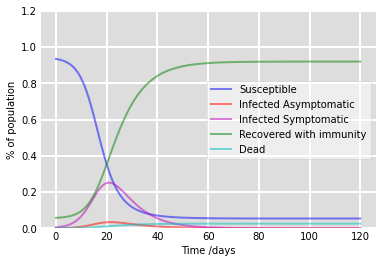

In [ ]:
# Plot the data on three separate curves for S(t), I(t) and R(t)
fig = plt.figure(facecolor='w')
ax = fig.add_subplot(111, facecolor='#dddddd', axisbelow=True)
ax.plot(t, S/N, 'b', alpha=0.5, lw=2, label='Susceptible')
ax.plot(t, IA/N, 'r', alpha=0.5, lw=2, label='Infected Asymptomatic')
ax.plot(t, IS/N, 'm', alpha=0.5, lw=2, label='Infected Symptomatic')
ax.plot(t, R/N, 'g', alpha=0.5, lw=2, label='Recovered with immunity')
ax.plot(t, D/N, 'c', alpha=0.5, lw=2, label='Dead')
ax.set_xlabel('Time /days')
ax.set_ylabel('% of population')
ax.set_ylim(0,1.2)
ax.yaxis.set_tick_params(length=0)
ax.xaxis.set_tick_params(length=0)
ax.grid(b=True, which='major', c='w', lw=2, ls='-')
legend = ax.legend()
legend.get_frame().set_alpha(0.5)
for spine in ('top', 'right', 'bottom', 'left'):
    ax.spines[spine].set_visible(False)
plt.savefig('sir.pdf')
plt.show()

Agora vamos estimar alguns parâmetros de forma a estudar o que aconteceria em 2 cenários:


*   Um com grande circulação de pessoas, de forma a aumentar a taxa de transmissão e de morte e diminuir as de recuperação devido à sobrecarga nos serviços médicos.
*   Um maior distanciamento social de forma a diminuir a taxa de transmissão.



#Cenário 3

In [ ]:
betaA, betaS, gammaA, gammaS,deathRate = 0.600, 0.600, 0.079, 0.097,0.004
#adjusting linspace to accomodate shorter epidemic
t = np.linspace(0, 70, 120)

In [ ]:
# Initial conditions vector
y0 = S0, IA0, IS0, R0, D0
# Integrate the SIR equations over the time grid, t.
ret = odeint(deriv, y0, t, args=(N, betaA, betaS, gammaA, gammaS, pSymp, deathRate))
S, IA, IS, R, D = ret.T

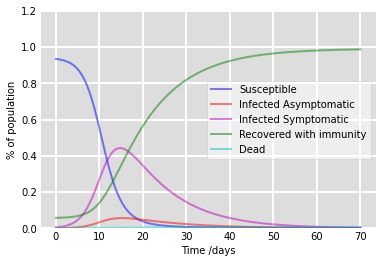

In [ ]:
# Plot the data on three separate curves for S(t), I(t) and R(t)
fig = plt.figure(facecolor='w')
ax = fig.add_subplot(111, facecolor='#dddddd', axisbelow=True)
ax.plot(t, S/N, 'b', alpha=0.5, lw=2, label='Susceptible')
ax.plot(t, IA/N, 'r', alpha=0.5, lw=2, label='Infected Asymptomatic')
ax.plot(t, IS/N, 'm', alpha=0.5, lw=2, label='Infected Symptomatic')
ax.plot(t, R/N, 'g', alpha=0.5, lw=2, label='Recovered with immunity')
ax.plot(t, D/N, 'c', alpha=0.5, lw=2, label='Dead')
ax.set_xlabel('Time /days')
ax.set_ylabel('% of population')
ax.set_ylim(0,1.2)
ax.yaxis.set_tick_params(length=0)
ax.xaxis.set_tick_params(length=0)
ax.grid(b=True, which='major', c='w', lw=2, ls='-')
legend = ax.legend()
legend.get_frame().set_alpha(0.5)
for spine in ('top', 'right', 'bottom', 'left'):
    ax.spines[spine].set_visible(False)
plt.savefig('sir.pdf')
plt.show()

In [ ]:
#death rate relative to recovered cases and to total population
(D/R)[-1], D[-1]/N

(0.005494986364002061, 0.005427451676892338)

Nesse novo modelo percebemos que o pico foi bem maior e que tivemos um maior número de mortos e infectados total.

#Cenário 4

In [ ]:
betaA, betaS, gammaA, gammaS,deathRate = 0.300, 0.300, 0.114, 0.139,0.002
#adjusting linspace to accomodate shorter epidemic
t = np.linspace(0, 100, 120)

In [ ]:
# Initial conditions vector
y0 = S0, IA0, IS0, R0, D0
# Integrate the SIR equations over the time grid, t.
ret = odeint(deriv, y0, t, args=(N, betaA, betaS, gammaA, gammaS, pSymp, deathRate))
S, IA, IS, R, D = ret.T

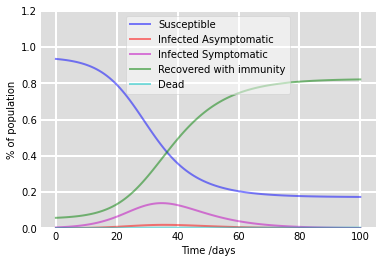

In [ ]:
# Plot the data on three separate curves for S(t), I(t) and R(t)
fig = plt.figure(facecolor='w')
ax = fig.add_subplot(111, facecolor='#dddddd', axisbelow=True)
ax.plot(t, S/N, 'b', alpha=0.5, lw=2, label='Susceptible')
ax.plot(t, IA/N, 'r', alpha=0.5, lw=2, label='Infected Asymptomatic')
ax.plot(t, IS/N, 'm', alpha=0.5, lw=2, label='Infected Symptomatic')
ax.plot(t, R/N, 'g', alpha=0.5, lw=2, label='Recovered with immunity')
ax.plot(t, D/N, 'c', alpha=0.5, lw=2, label='Dead')
ax.set_xlabel('Time /days')
ax.set_ylabel('% of population')
ax.set_ylim(0,1.2)
ax.yaxis.set_tick_params(length=0)
ax.xaxis.set_tick_params(length=0)
ax.grid(b=True, which='major', c='w', lw=2, ls='-')
legend = ax.legend()
legend.get_frame().set_alpha(0.5)
for spine in ('top', 'right', 'bottom', 'left'):
    ax.spines[spine].set_visible(False)
plt.savefig('sir.pdf')
plt.show()

In [ ]:
#death rate relative to recovered cases and to total population
(D/R)[-1], D[-1]/N

(0.004203760391148033, 0.0034541066304653876)

Nesse último cenário, podemos ver como o pico da epidemia é retardado e possui menor amplitude, devido à menor taxa de contato.

#Resultados e discussão

Pelo gráfico, temos que após 25 dias tivemos o pico de casos, com aumento geral do número de infectados. Após 60 dias, tivemos maior estabilidade na pandemia, com aumento do número de recuperados e diminuição de suscetíveis e infectados, além do número de mortos. \

A partir dos cenários 3 e 4, pudemos analisar os efeitos da diminuição na taxa de transmissão devido ao distanciamento social e medidas de quarentena, assim como os efeitos de altas taxas de transmissão devido ao pouco cuidado com a doença. 

# Conclusão

Percebe-se que essa metodologia é capaz de gerar um cenário similar ao esperado de uma epidemia, sendo necessário apenas ajustar os parâmetros para termos um modelo que simule, com certo grau de confiânça, a COVID-19.

Embora tenhamos usado dados reais provenientes dor órgãos governamentais e parâmetros de modelo coerentes com outros trabalhos acadêmicos obtivemos um resultado não esperado. Como foi possível observar, a epidemia do Corona Vírus, comparado com o Cenário 1, não teve seu pico tão próximo do seu início e até hoje (mais de um ano do começo) não obtivemos um sistema em equilibrio, o que, no modelo gerado, demoraria apenas 40 dias.

Já os resultados dos cenários 2 e 3 nos mostram como medidas que visam diminuir a taxa de transmissão podem ser efetivas em diminuir o total de mortos e infectados, assim como diminuir a sobrecarga sobre os serviços de saúde.

#Referências

[1] https://dados.seplag.pe.gov.br/apps/corona.html (dados colhidos em 26/08/2021)

[2] "Modeling and forecasting the Covid-19 pandemic in Brazil", Saulo B. Bastos and Daniel O. Cajueiro - April 1 2020 - Brasília, Brazil.
